# Travel Review Rating

## Usecase & Description

-- Details would be added here

#### 1. Import Required Libraries

##### Install Required Python Libraries if not exists

In [36]:
!pip install faker pandas numpy matplotlib seaborn scikit-learn ucimlrepo scipy IPython --quiet

In [38]:
## Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from ucimlrepo import fetch_ucirepo 
import warnings
import scipy.stats as stats
from faker import Faker
import os
import random
import pandas as pd
warnings.filterwarnings('ignore')


#### 2. Data Aquisition from UCI - Repository

In [26]:

# fetch dataset 
travel_review_ratings = fetch_ucirepo(id=485) 
  
# data (as pandas dataframes) 
X = travel_review_ratings.data.features 
y = travel_review_ratings.data.targets 
  
# variable information 
display(travel_review_ratings.variables) 


,name,role,type,demographic,description,units,missing_values
0,userid,ID,Categorical,None,None,None,no
1,churches,Feature,Continuous,None,None,None,no
2,resorts,Feature,Continuous,None,None,None,no
3,beaches,Feature,Integer,None,None,None,no
4,parks,Feature,Continuous,None,None,None,no
5,theatres,Feature,Continuous,None,None,None,no
6,museums,Feature,Continuous,None,None,None,no
7,malls,Feature,Continuous,None,None,None,no
8,zoos,Feature,Continuous,None,None,None,no
9,restaurants,Feature,Integer,None,None,None,no


In [27]:
## Convert the UCI ML Repo dataset to a pandas DataFrame
df_travel_review_ratings = travel_review_ratings.data.original
display(df_travel_review_ratings)

,userid,churches,resorts,beaches,parks,theatres,museums,malls,zoos,restaurants,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,...,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12


#### 3. Generate User Demographics Data using Python Faker Library if the Data doesn't exist Locally

In [39]:


# Check if the file exists
if not os.path.exists('all_users.csv'):

    fake = Faker()
    num_users = 6000
    countries = ['US', 'UK', 'IN']
    genders = ['Male', 'Female']

    data = []
    for i in range(1, num_users + 1):
        user = {
            'userid': f'User {i}',
            'age': random.randint(18, 80),
            'gender': random.choice(genders),
            'country': random.choice(countries)
        }
        data.append(user)

    df_fake_users = pd.DataFrame(data)
    df_fake_users.to_csv('all_users.csv', index=False)
    print("all_users.csv generated.")
else:
    print("all_users.csv already exists.")

all_users.csv already exists.


In [29]:
df_user_demographics = pd.read_csv('all_users.csv', sep=',')
display(df_user_demographics)

,userid,age,gender,country
0,User 1,52,Male,IN
1,User 2,66,Female,US
2,User 3,46,Female,UK
3,User 4,70,Female,UK
4,User 5,28,Male,UK
...,...,...,...,...
5995,User 5996,31,Male,UK
5996,User 5997,78,Male,IN
5997,User 5998,30,Female,IN
5998,User 5999,19,Male,UK


In [30]:
df_user_travel_reviews = pd.merge(df_user_demographics, df_travel_review_ratings, on='userid', how='inner')
display(df_user_travel_reviews)

,userid,age,gender,country,churches,resorts,beaches,parks,theatres,museums,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
0,User 1,52,Male,IN,0.00,0.00,3.63,3.65,5.00,2.92,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1,User 2,66,Female,US,0.00,0.00,3.63,3.65,5.00,2.92,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2,User 3,46,Female,UK,0.00,0.00,3.63,3.63,5.00,2.92,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3,User 4,70,Female,UK,0.00,0.50,3.63,3.63,5.00,2.92,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4,User 5,28,Male,UK,0.00,0.00,3.63,3.63,5.00,2.92,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,71,Female,IN,0.91,5.00,4.00,2.79,2.77,2.57,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,User 5453,79,Male,UK,0.93,5.00,4.02,2.79,2.78,2.57,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,User 5454,21,Female,IN,0.94,5.00,4.03,2.80,2.78,2.57,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,User 5455,41,Male,US,0.95,4.05,4.05,2.81,2.79,2.44,...,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12


In [31]:
## Perform Descriptive Statistics on the DataFrame
## We can see 
display(df_user_travel_reviews.describe(include='all'))

,userid,age,gender,country,churches,resorts,beaches,parks,theatres,museums,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
count,5456,5456.000000,5456,5456,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000
unique,5456,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,User 1,NaN,Male,US,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,2777,1843,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,48.802786,NaN,NaN,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,...,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755
std,NaN,18.045994,NaN,NaN,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,...,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756
min,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,33.000000,NaN,NaN,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,NaN,49.000000,NaN,NaN,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,NaN,64.000000,NaN,NaN,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000


Missing values per column:
 burger/pizza shops    1
gardens               1
dtype: int64

Data types:
 userid                    object
age                        int64
gender                    object
country                   object
churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoos                     float64
restaurants              float64
pubs/bars                float64
local services            object
burger/pizza shops       float64
hotels/other lodgings    float64
juice bars               float64
art galleries            float64
dance clubs              float64
swimming pools           float64
gyms                     float64
bakeries                 float64
beauty & spas            float64
cafes                    float64
view points              float64
monuments                float64
garden

,userid,age,gender,country,churches,resorts,beaches,parks,theatres,museums,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
count,5454,5454.000000,5454,5454,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,...,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000
unique,5454,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,User 1,NaN,Male,US,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,2776,1842,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,48.805281,NaN,NaN,1.455746,2.320048,2.489059,2.797103,2.958904,2.893423,...,2.206140,1.192710,0.949349,0.822525,0.969250,0.999626,0.965275,1.749345,1.531051,1.560570
std,NaN,18.048009,NaN,NaN,0.827732,1.421576,1.247503,1.309188,1.338785,1.282101,...,1.715848,1.107176,0.973628,0.948015,1.202883,1.193129,0.928326,1.597816,1.316180,1.171784
min,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.830000,1.120000,1.110000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,33.000000,NaN,NaN,0.920000,1.360000,1.540000,1.730000,1.770000,1.790000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,NaN,49.000000,NaN,NaN,1.340000,1.910000,2.060000,2.460000,2.670000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,NaN,64.000000,NaN,NaN,1.810000,2.687500,2.740000,4.097500,4.310000,3.837500,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000



Value counts for gender:
gender
Male      2776
Female    2678
Name: count, dtype: int64

Value counts for country:
country
US    1842
IN    1813
UK    1799
Name: count, dtype: int64


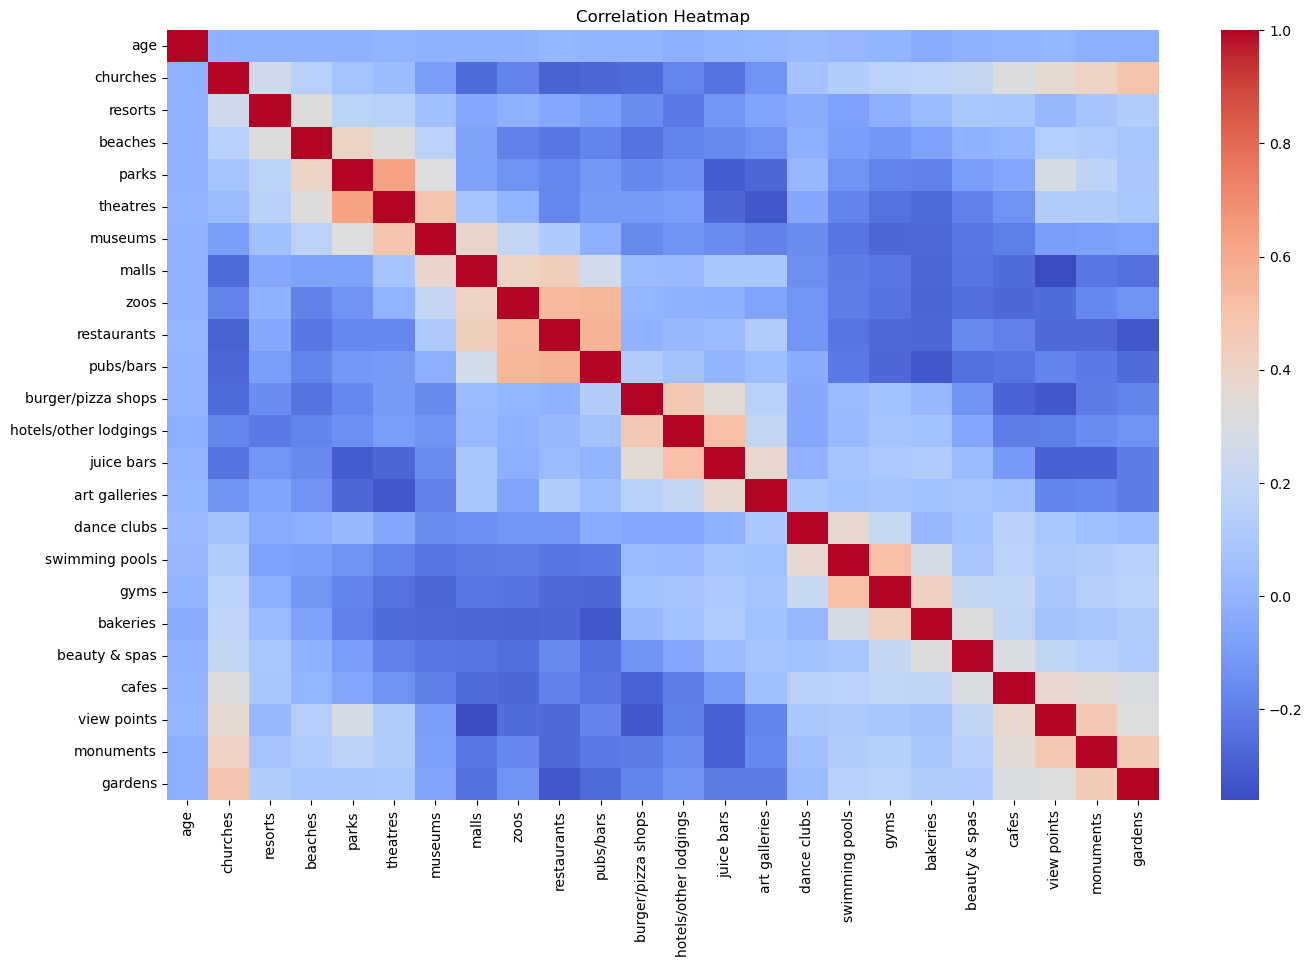

In [32]:
# Exploratory Data Analysis (EDA) and Cleanup for df_user_travel_reviews

# 1. Check for missing values
missing_counts = df_user_travel_reviews.isnull().sum()
print("Missing values per column:\n", missing_counts[missing_counts > 0])

# 2. Drop rows with missing values (if any)
df_user_travel_reviews_clean = df_user_travel_reviews.dropna().reset_index(drop=True)

# 3. Check data types
print("\nData types:\n", df_user_travel_reviews_clean.dtypes)

# 4. Check for duplicates
duplicates = df_user_travel_reviews_clean.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# 5. Drop duplicates if any
df_user_travel_reviews_clean = df_user_travel_reviews_clean.drop_duplicates().reset_index(drop=True)

# 6. Basic statistics
display(df_user_travel_reviews_clean.describe(include='all'))

# 7. Value counts for categorical columns
for col in ['gender', 'country']:
    print(f"\nValue counts for {col}:")
    print(df_user_travel_reviews_clean[col].value_counts())

# 8. Correlation heatmap for numeric columns
plt.figure(figsize=(16, 10))
sns.heatmap(df_user_travel_reviews_clean.select_dtypes(include='number').corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 9. Update the main dataframe variable for further analysis
df_user_travel_reviews = df_user_travel_reviews_clean

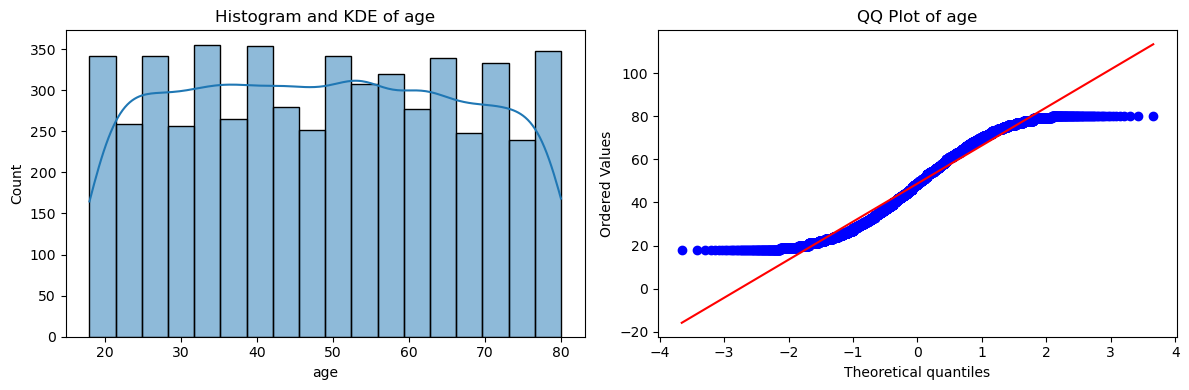

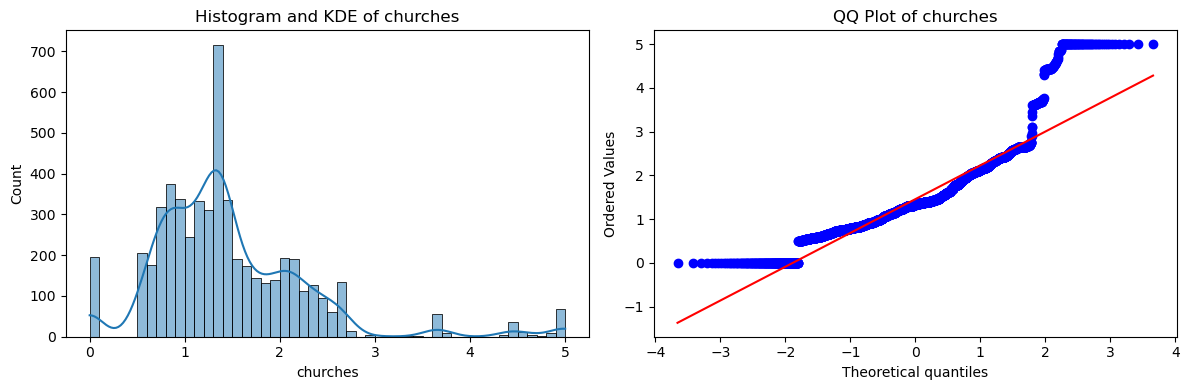

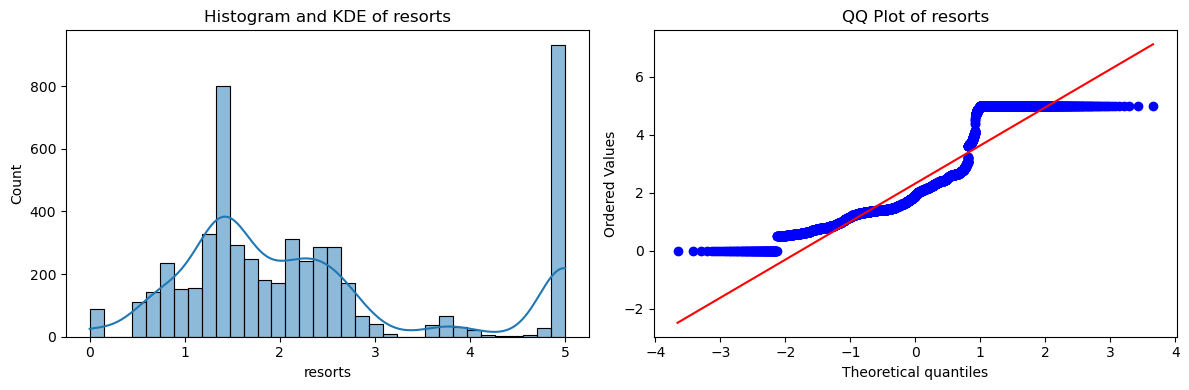

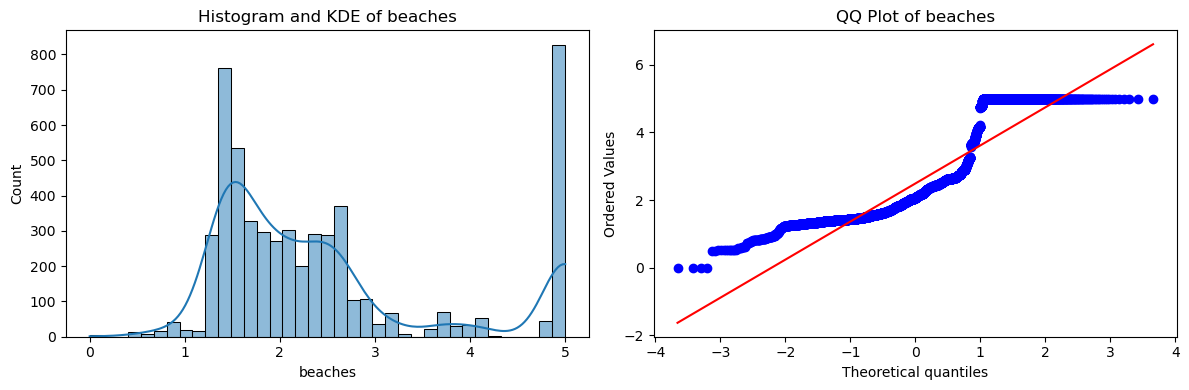

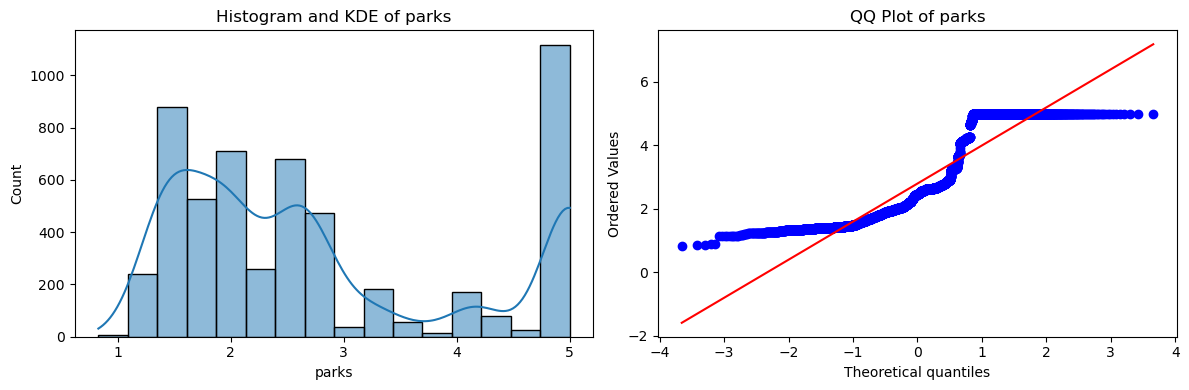

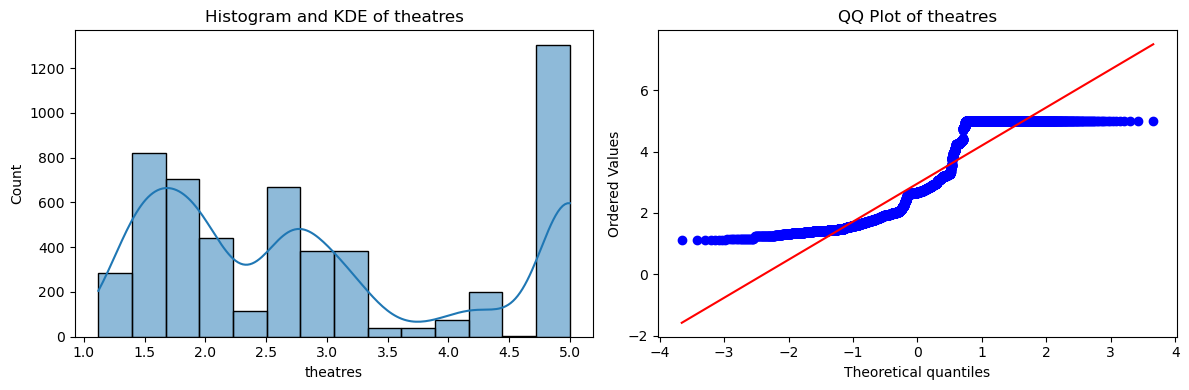

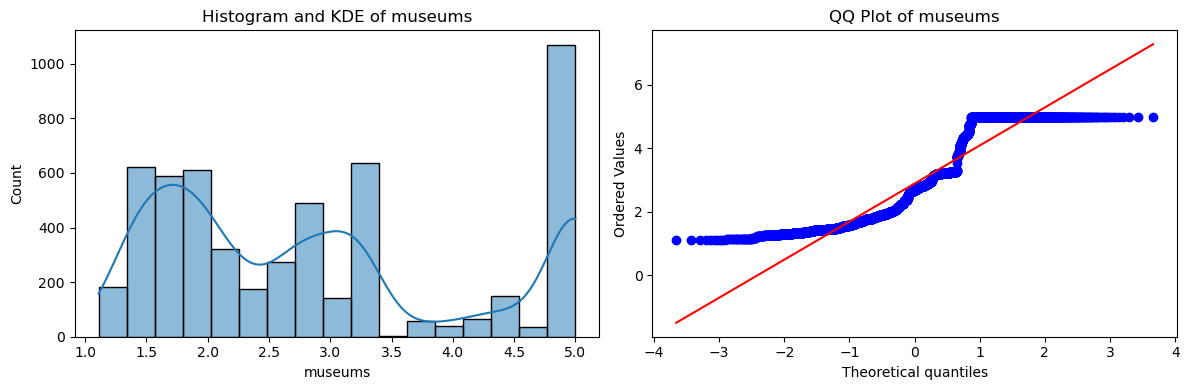

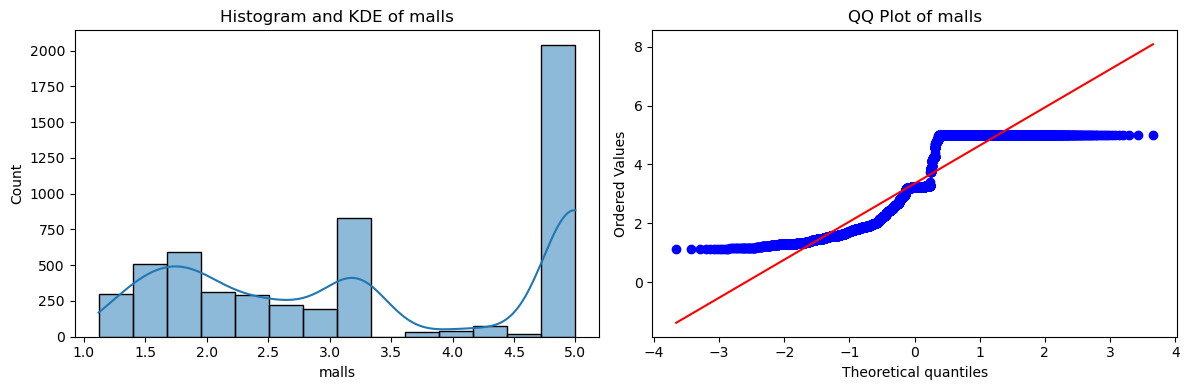

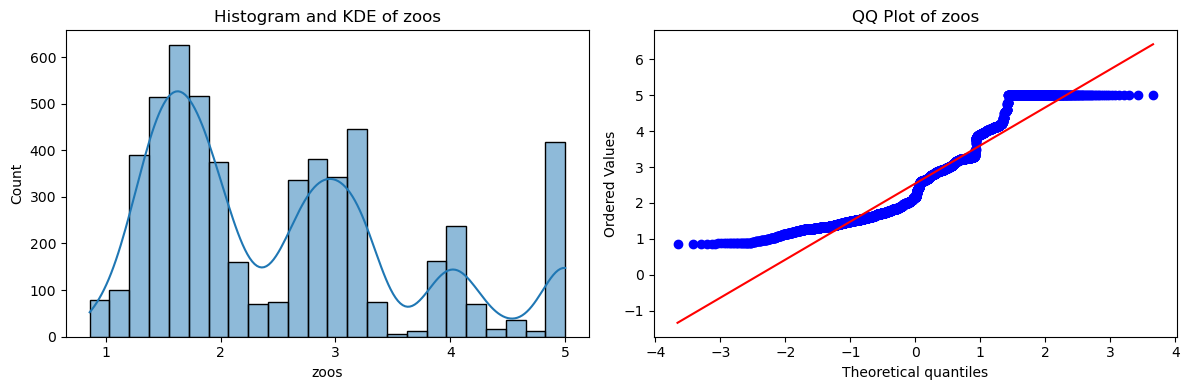

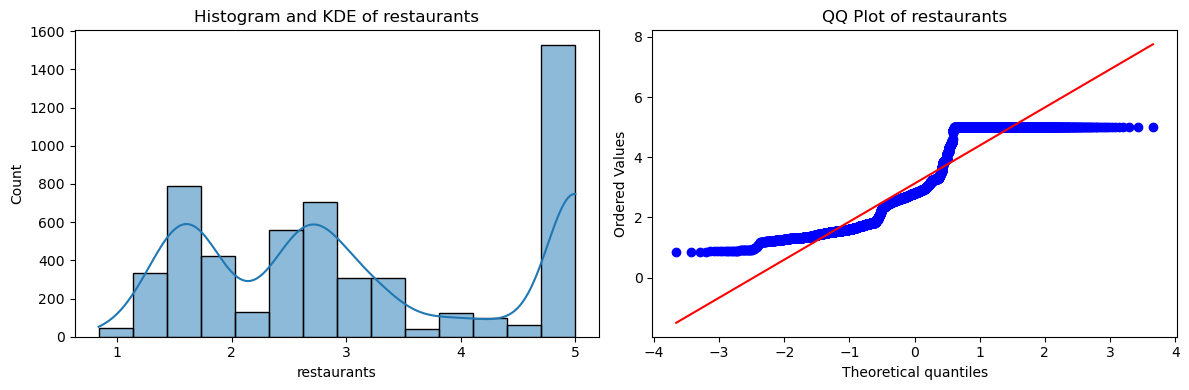

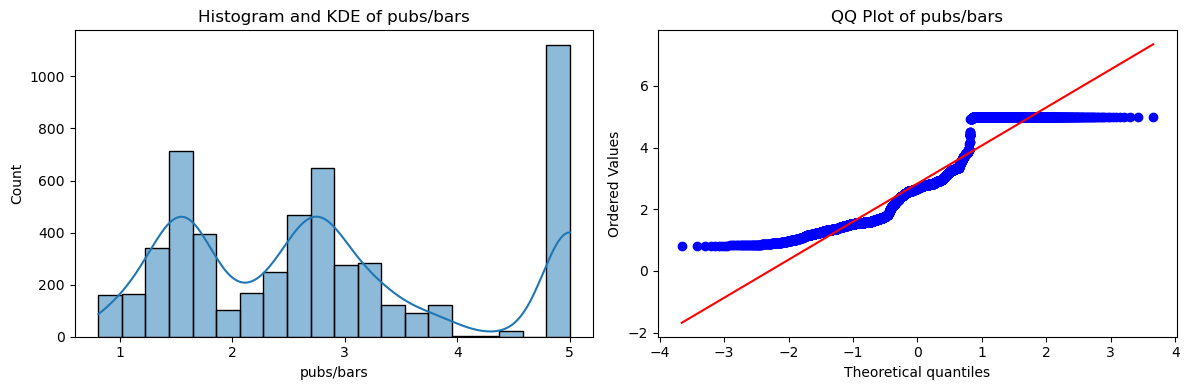

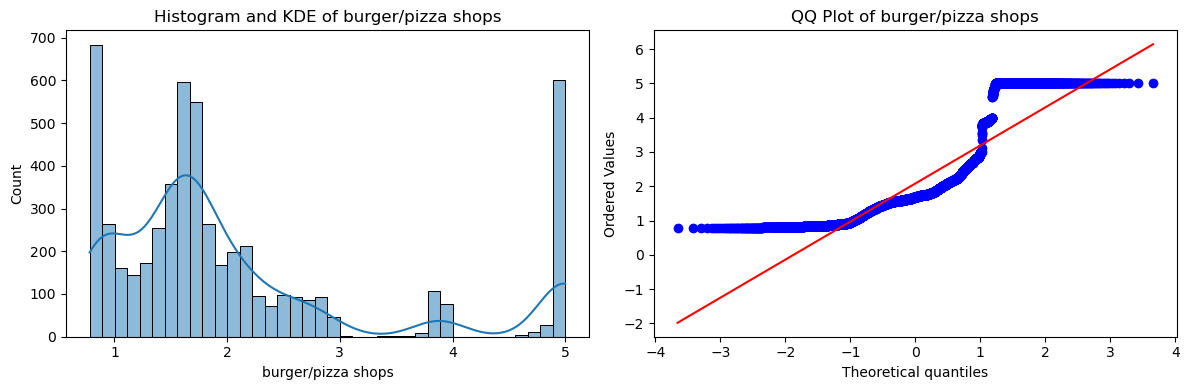

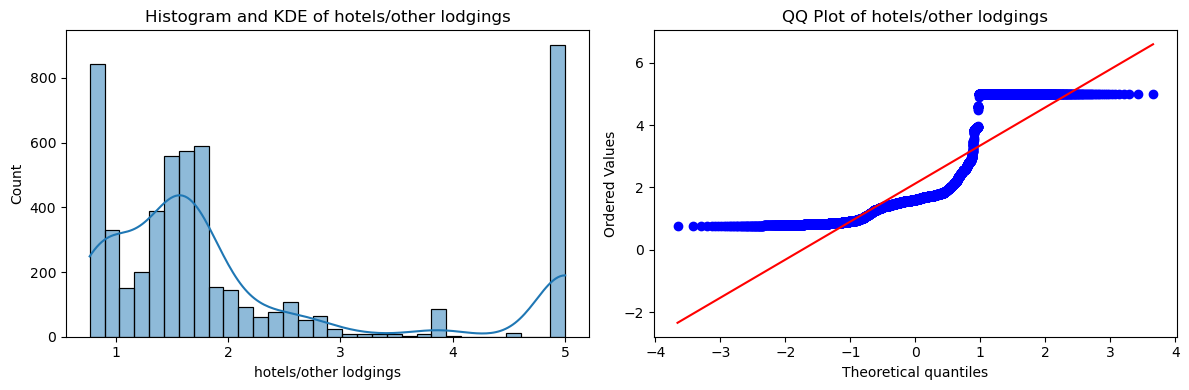

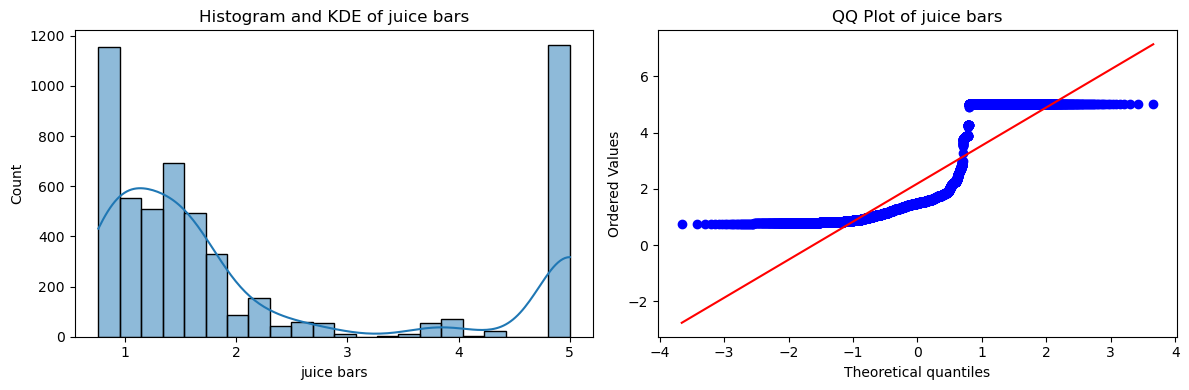

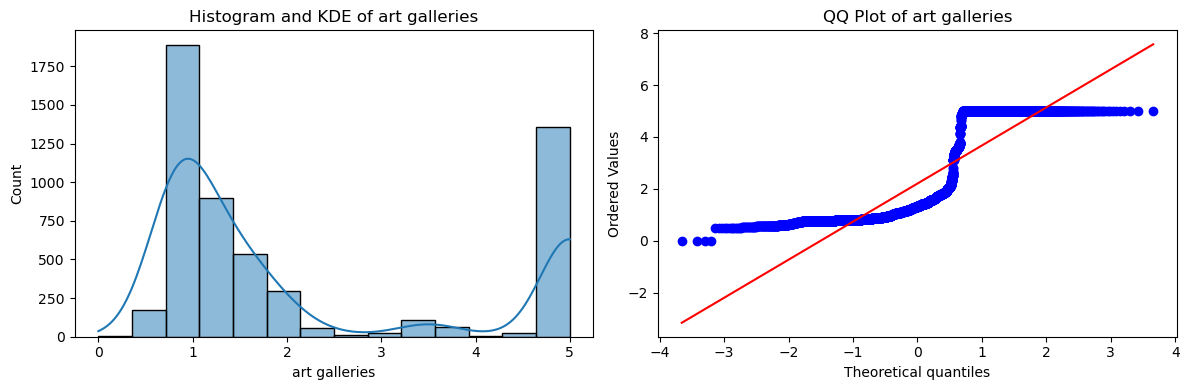

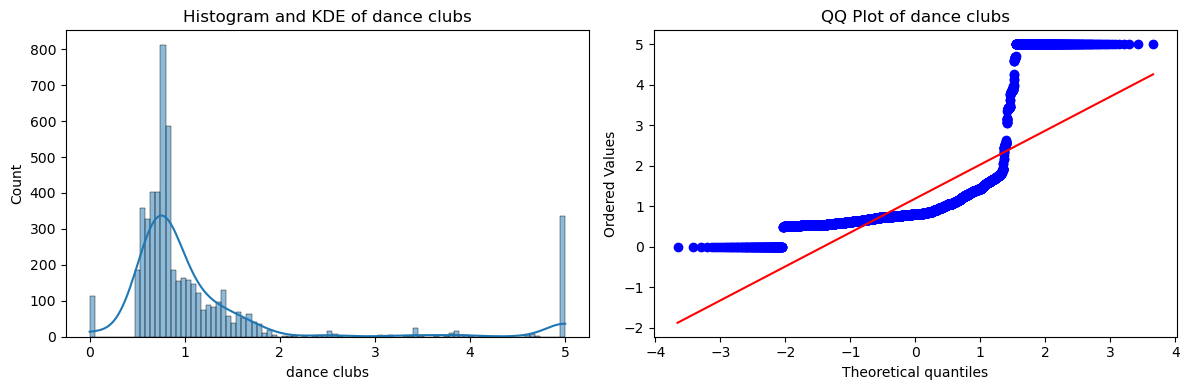

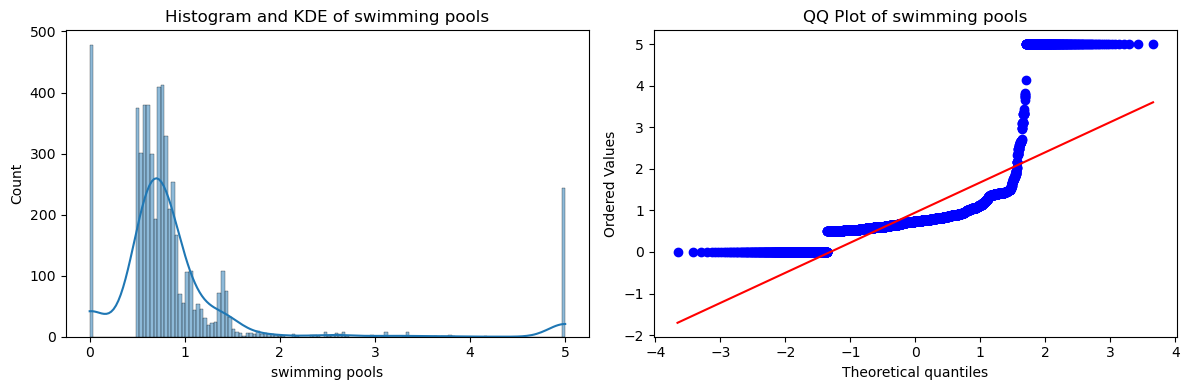

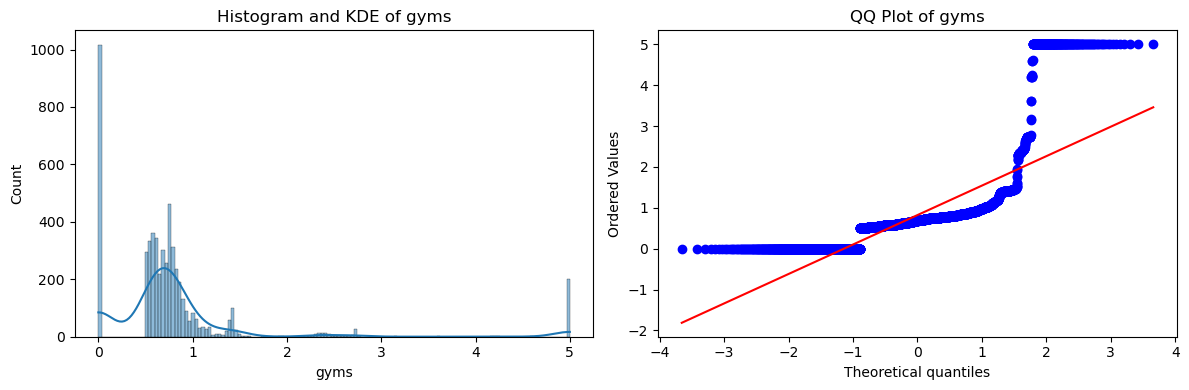

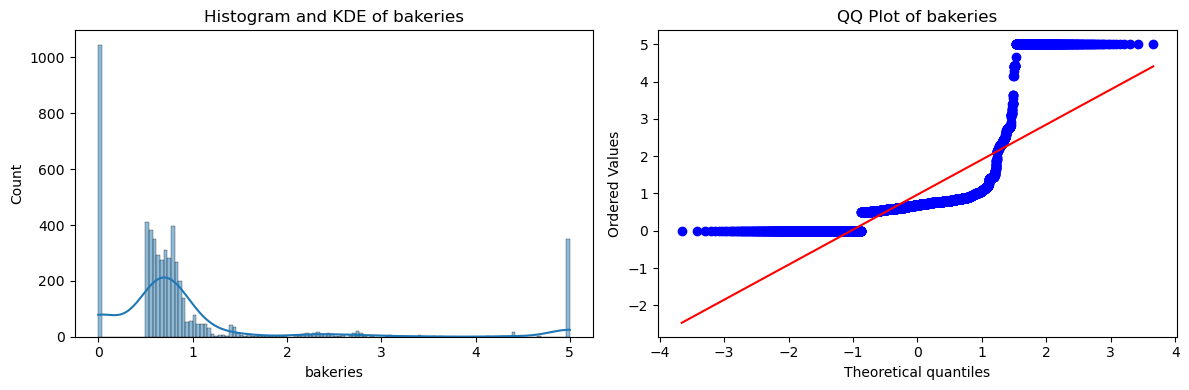

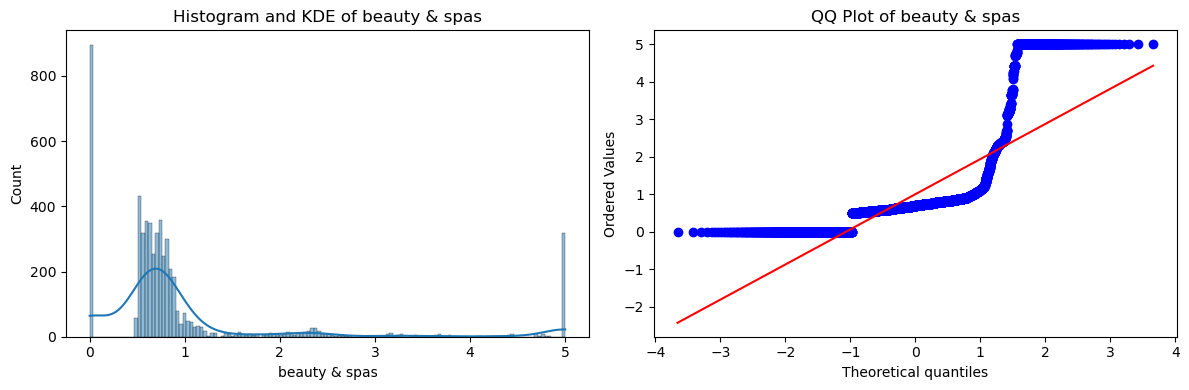

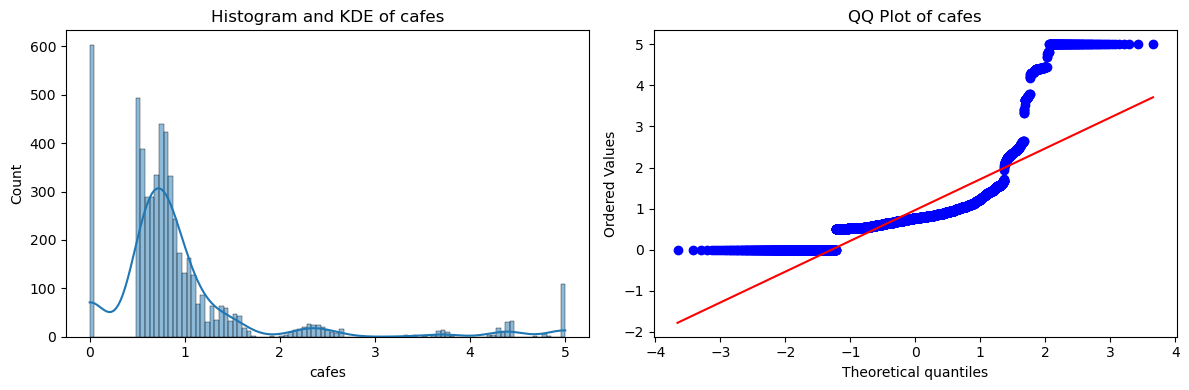

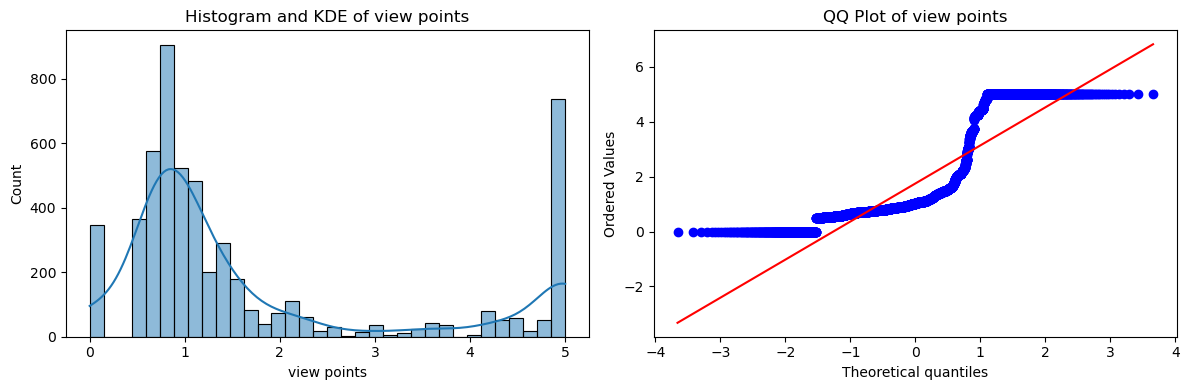

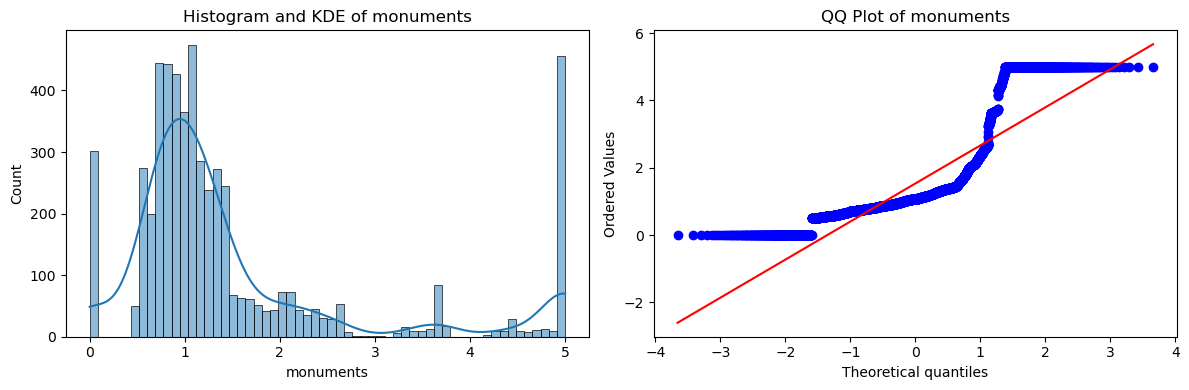

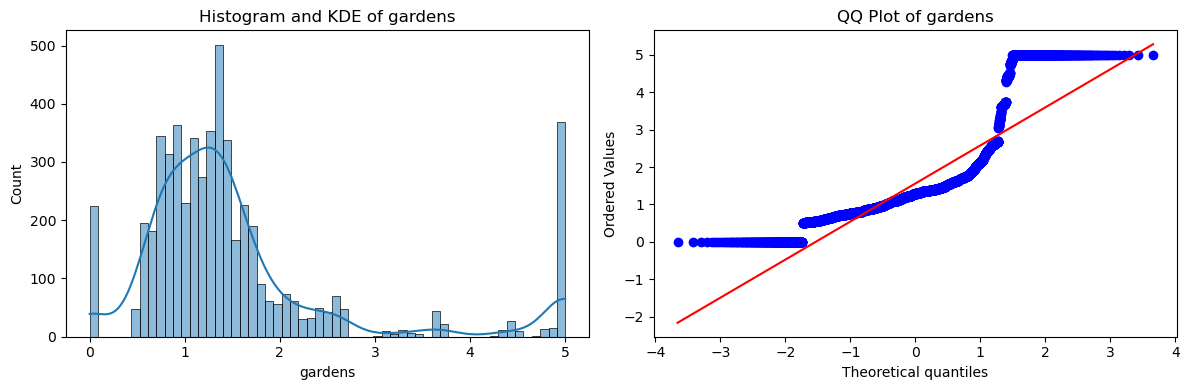

In [33]:
## Print the distribution of the Data

for col in df_user_travel_reviews.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df_user_travel_reviews[col], kde=True)
    plt.title(f'Histogram and KDE of {col}')
    
    plt.subplot(1, 2, 2)
    stats.probplot(df_user_travel_reviews[col].dropna(), dist="norm", plot=plt)
    plt.title(f'QQ Plot of {col}')
    
    plt.tight_layout()
    plt.show()

In [34]:
from scipy.stats import shapiro, anderson, kstest

for col in df_user_travel_reviews.select_dtypes(include=['float64', 'int64']).columns:
    print(f'\nColumn: {col}')
    
    data = df_user_travel_reviews[col].dropna()
    
    # Shapiro-Wilk Test (for small-medium datasets)
    stat, p = shapiro(data)
    print(f'Shapiro-Wilk: stat={stat:.4f}, p={p:.4f}')
    
    # Anderson-Darling Test
    result = anderson(data, dist='norm')
    print('Anderson-Darling Statistic:', result.statistic)
    print('Critical Values:', result.critical_values)
    
    # Kolmogorov-Smirnov (optional)
    d_stat, d_p = kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f'Kolmogorov-Smirnov: stat={d_stat:.4f}, p={d_p:.4f}')


Column: age
Shapiro-Wilk: stat=0.9572, p=0.0000
Anderson-Darling Statistic: 55.529452479641805
Critical Values: [0.576 0.656 0.786 0.917 1.091]
Kolmogorov-Smirnov: stat=0.0644, p=0.0000

Column: churches
Shapiro-Wilk: stat=0.8712, p=0.0000
Anderson-Darling Statistic: 143.52778957890132
Critical Values: [0.576 0.656 0.786 0.917 1.091]
Kolmogorov-Smirnov: stat=0.1358, p=0.0000

Column: resorts
Shapiro-Wilk: stat=0.8540, p=0.0000
Anderson-Darling Statistic: 307.9715170234231
Critical Values: [0.576 0.656 0.786 0.917 1.091]
Kolmogorov-Smirnov: stat=0.1530, p=0.0000

Column: beaches
Shapiro-Wilk: stat=0.8147, p=0.0000
Anderson-Darling Statistic: 386.10201619790496
Critical Values: [0.576 0.656 0.786 0.917 1.091]
Kolmogorov-Smirnov: stat=0.1787, p=0.0000

Column: parks
Shapiro-Wilk: stat=0.8398, p=0.0000
Anderson-Darling Statistic: 321.80129606632
Critical Values: [0.576 0.656 0.786 0.917 1.091]
Kolmogorov-Smirnov: stat=0.1670, p=0.0000

Column: theatres
Shapiro-Wilk: stat=0.8550, p=0.0000


In [21]:
# === Define distributions to check ===
distributions = ['norm', 'gamma', 'expon', 'lognorm', 'beta']

# === Function to fit distributions and compute KS test ===
def analyze_distribution(series, dists):
    results = []
    data = series.dropna().values
    if len(data) < 10:
        return None  # Skip small samples
    for dist_name in dists:
        dist = getattr(stats, dist_name)
        try:
            params = dist.fit(data)
            D, p = stats.kstest(data, dist_name, args=params)
            results.append((dist_name, D, p))
        except Exception as e:
            continue  # Skip if fitting fails
    return sorted(results, key=lambda x: x[2], reverse=True)  # sort by p-value desc

# === Analyze all numeric columns ===
def analyze_dataframe_distributions(df, dists):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    summary = {}
    for col in numeric_cols:
        print(f"\nAnalyzing column: {col}")
        results = analyze_distribution(df[col], dists)
        if results:
            summary[col] = results
            for dist, D, p in results:
                print(f"  {dist:>8} | KS Stat = {D:.4f} | p = {p:.4f}")
        else:
            print("  Not enough data or fitting failed.")
    return summary

# === Run the analysis ===
distribution_summary = analyze_dataframe_distributions(df_user_travel_reviews, distributions)




Analyzing column: age
      beta | KS Stat = 0.0364 | p = 0.0000
   lognorm | KS Stat = 0.0648 | p = 0.0000
     gamma | KS Stat = 0.0655 | p = 0.0000
      norm | KS Stat = 0.0659 | p = 0.0000
     expon | KS Stat = 0.1612 | p = 0.0000

Analyzing column: churches
      beta | KS Stat = 0.0828 | p = 0.0000
     gamma | KS Stat = 0.0839 | p = 0.0000
      norm | KS Stat = 0.1358 | p = 0.0000
     expon | KS Stat = 0.2815 | p = 0.0000
   lognorm | KS Stat = 0.5378 | p = 0.0000

Analyzing column: resorts
     gamma | KS Stat = 0.1158 | p = 0.0000
      norm | KS Stat = 0.1530 | p = 0.0000
     expon | KS Stat = 0.2425 | p = 0.0000
   lognorm | KS Stat = 0.5293 | p = 0.0000
      beta | KS Stat = 0.3731 | p = 0.0000

Analyzing column: beaches
   lognorm | KS Stat = 0.1101 | p = 0.0000
     gamma | KS Stat = 0.1165 | p = 0.0000
      norm | KS Stat = 0.1787 | p = 0.0000
     expon | KS Stat = 0.3690 | p = 0.0000
      beta | KS Stat = 0.3150 | p = 0.0000

Analyzing column: parks
   lognorm